In [74]:

scotrail = pd.read_csv('Datasets/scotrail-journey-data-2016-2022.csv')

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
scotrail.head()

,CalendarYear,CalendarPeriod,CalendarWeek,ServiceGroup4,ProdGrp1,OpJourneys on selDates,OpMiles on selDates,Unnamed: 7
0,2016,2016/P01,2016/W01,East Suburban,Commuter,"68,625","1,163,739",NaN
1,2016,2016/P01,2016/W01,eXpress,Commuter,"33,695","953,075",NaN
2,2016,2016/P01,2016/W01,Inter7City,Commuter,"27,651","757,075",NaN
3,2016,2016/P01,2016/W01,Scenic,Commuter,"9,806","180,878",NaN
4,2016,2016/P01,2016/W01,West Suburban,Commuter,"302,609","3,303,754",NaN


In [76]:
scotrail["OpJourneys on selDates"] = scotrail["OpJourneys on selDates"].replace(',','', regex=True)
scotrail["OpJourneys on selDates"] = scotrail["OpJourneys on selDates"].astype('int')


In [77]:
df = scotrail.groupby(['ServiceGroup4'])['OpJourneys on selDates'].sum().reset_index()
df

,ServiceGroup4,OpJourneys on selDates
0,East Suburban,53855635
1,Inter7City,44569490
2,Scenic,18157333
3,West Suburban,295816539
4,eXpress,33204829


In [78]:
journeys = df['OpJourneys on selDates']
service = df['ServiceGroup4']

<BarContainer object of 5 artists>

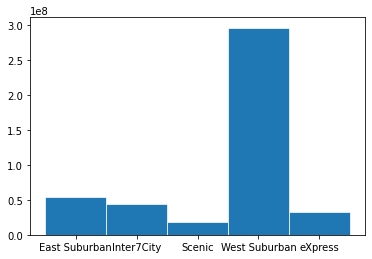

In [79]:
plt.bar(service, journeys, width=1, edgecolor="white", linewidth=0.7)

In [69]:
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

[(0.0, 8.0),
 (0.0, 8.0),